In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [35]:
import numpy as np
import pandas as pd

In [36]:
legacy_url = "C:\\Users\\user\\Downloads\\male_players (legacy).csv"

In [37]:
df_train = pd.read_csv(legacy_url, low_memory=False)

In [38]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161583 entries, 0 to 161582
Columns: 110 entries, player_id to player_face_url
dtypes: float64(18), int64(45), object(47)
memory usage: 135.6+ MB


In [39]:
df_train.columns

Index(['player_id', 'player_url', 'fifa_version', 'fifa_update',
       'fifa_update_date', 'short_name', 'long_name', 'player_positions',
       'overall', 'potential',
       ...
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk',
       'player_face_url'],
      dtype='object', length=110)

In [40]:
#check if our independent variable is there are missing values
df_train['overall']

0         93
1         92
2         90
3         90
4         90
          ..
161578    46
161579    46
161580    46
161581    46
161582    46
Name: overall, Length: 161583, dtype: int64

In [41]:
df_train.head()

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,158023,/player/158023/lionel-messi/150002,15,2,2014-09-18,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,...,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png
1,20801,/player/20801/c-ronaldo-dos-santos-aveiro/150002,15,2,2014-09-18,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,...,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png
2,9014,/player/9014/arjen-robben/150002,15,2,2014-09-18,A. Robben,Arjen Robben,"RM, LM, RW",90,90,...,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png
3,41236,/player/41236/zlatan-ibrahimovic/150002,15,2,2014-09-18,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,...,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png
4,167495,/player/167495/manuel-neuer/150002,15,2,2014-09-18,M. Neuer,Manuel Peter Neuer,GK,90,90,...,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png


In [42]:

# Finding of the percentage of missing value in each column
Percentage = (df_train.isna().sum()/len(df_train))*100
# Dropping of the same of the columns with >= 30% NaN
columns_to_drop = Percentage[Percentage>=30].index
columns_to_drop
     

Index(['club_loaned_from', 'nation_team_id', 'nation_position',
       'nation_jersey_number', 'release_clause_eur', 'player_tags',
       'player_traits', 'goalkeeping_speed'],
      dtype='object')

In [43]:
#New dataframe with colums dropped 
df_cleaned = df_train.drop(columns = columns_to_drop, axis = 1)
df_cleaned.head()

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,158023,/player/158023/lionel-messi/150002,15,2,2014-09-18,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,...,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png
1,20801,/player/20801/c-ronaldo-dos-santos-aveiro/150002,15,2,2014-09-18,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,...,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png
2,9014,/player/9014/arjen-robben/150002,15,2,2014-09-18,A. Robben,Arjen Robben,"RM, LM, RW",90,90,...,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png
3,41236,/player/41236/zlatan-ibrahimovic/150002,15,2,2014-09-18,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,...,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png
4,167495,/player/167495/manuel-neuer/150002,15,2,2014-09-18,M. Neuer,Manuel Peter Neuer,GK,90,90,...,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png


In [44]:
#Separation of categorical and numerical values 
numerical_cols =df_cleaned.select_dtypes(exclude=['object'])
numerical_cols

,player_id,fifa_version,fifa_update,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,...,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,15,2,93,95,100500000.0,550000.0,27,169,67,...,76,NaN,25,21,20,6,11,15,14,8
1,20801,15,2,92,92,79000000.0,375000.0,29,185,80,...,85,NaN,22,31,23,7,11,15,14,11
2,9014,15,2,90,90,54500000.0,275000.0,30,180,80,...,80,NaN,29,26,26,10,8,11,5,15
3,41236,15,2,90,90,52500000.0,275000.0,32,195,95,...,91,NaN,25,41,27,13,15,10,9,12
4,167495,15,2,90,90,63500000.0,300000.0,28,193,92,...,37,NaN,25,25,25,87,85,92,90,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161578,269011,23,2,46,61,110000.0,700.0,18,180,73,...,54,40.0,23,21,25,9,13,13,12,7
161579,269019,23,2,46,58,110000.0,750.0,19,188,83,...,31,35.0,50,51,45,6,14,8,13,14
161580,271093,23,2,46,58,110000.0,500.0,19,181,73,...,37,35.0,36,45,50,8,9,7,14,9
161581,271555,23,2,46,70,150000.0,500.0,17,175,68,...,63,43.0,19,17,14,13,12,14,7,13


In [45]:
categoric_cols= df_cleaned.select_dtypes(include=['object'])
categoric_cols

,player_url,fifa_update_date,short_name,long_name,player_positions,dob,league_name,club_name,club_position,club_joined_date,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,/player/158023/lionel-messi/150002,2014-09-18,L. Messi,Lionel Andrés Messi Cuccittini,CF,1987-06-24,La Liga,FC Barcelona,CF,2004-07-01,...,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png
1,/player/20801/c-ronaldo-dos-santos-aveiro/150002,2014-09-18,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",1985-02-05,La Liga,Real Madrid CF,LW,2009-07-01,...,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png
2,/player/9014/arjen-robben/150002,2014-09-18,A. Robben,Arjen Robben,"RM, LM, RW",1984-01-23,Bundesliga,FC Bayern München,SUB,2009-08-28,...,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png
3,/player/41236/zlatan-ibrahimovic/150002,2014-09-18,Z. Ibrahimović,Zlatan Ibrahimović,ST,1981-10-03,Ligue 1,Paris Saint-Germain,ST,2012-07-01,...,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png
4,/player/167495/manuel-neuer/150002,2014-09-18,M. Neuer,Manuel Peter Neuer,GK,1986-03-27,Bundesliga,FC Bayern München,GK,2011-07-01,...,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161578,/player/269011/ziye-zhao/230002,2022-09-26,Zhao Ziye,赵梓业,RW,2003-10-01,Super League,Hebei CFFC,RES,2022-05-01,...,32+2,32+2,37+2,36+2,31+2,31+2,31+2,36+2,14+2,https://cdn.sofifa.net/players/269/011/23_120.png
161579,/player/269019/junjie-wu/230002,2022-09-26,Wu Junjie,吴俊杰,LB,2003-06-02,Super League,Guangzhou R&F,RES,2022-05-01,...,41+2,41+2,43+2,44+2,48+2,48+2,48+2,44+2,15+2,https://cdn.sofifa.net/players/269/019/23_120.png
161580,/player/271093/kailin-barlow/230002,2022-09-26,K. Barlow,Kailin Barlow,CDM,2003-06-28,Premier Division,Sligo Rovers,RES,2021-11-02,...,45+2,45+2,47+2,47+2,46+2,46+2,46+2,47+2,14+2,https://cdn.sofifa.net/players/271/093/23_120.png
161581,/player/271555/gideon-tetteh/230002,2022-09-26,G. Tetteh,Gideon Tetteh,"RW, LW",2005-05-20,Premier Division,Shamrock Rovers,RES,2022-06-24,...,30+2,30+2,34+2,32+2,28+2,28+2,28+2,32+2,15+2,https://cdn.sofifa.net/players/271/555/23_120.png


In [46]:
numerical_cols = numerical_cols.fillna(numerical_cols.mean())
numerical_cols

,player_id,fifa_version,fifa_update,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,...,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,15,2,93,95,100500000.0,550000.0,27,169,67,...,76,57.816892,25,21,20,6,11,15,14,8
1,20801,15,2,92,92,79000000.0,375000.0,29,185,80,...,85,57.816892,22,31,23,7,11,15,14,11
2,9014,15,2,90,90,54500000.0,275000.0,30,180,80,...,80,57.816892,29,26,26,10,8,11,5,15
3,41236,15,2,90,90,52500000.0,275000.0,32,195,95,...,91,57.816892,25,41,27,13,15,10,9,12
4,167495,15,2,90,90,63500000.0,300000.0,28,193,92,...,37,57.816892,25,25,25,87,85,92,90,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161578,269011,23,2,46,61,110000.0,700.0,18,180,73,...,54,40.000000,23,21,25,9,13,13,12,7
161579,269019,23,2,46,58,110000.0,750.0,19,188,83,...,31,35.000000,50,51,45,6,14,8,13,14
161580,271093,23,2,46,58,110000.0,500.0,19,181,73,...,37,35.000000,36,45,50,8,9,7,14,9
161581,271555,23,2,46,70,150000.0,500.0,17,175,68,...,63,43.000000,19,17,14,13,12,14,7,13


In [47]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Apply label encoder to each categorical column
factorizedData = categoric_cols.apply(encoder.fit_transform)
print("Encoded Categorical Columns:")
print(factorizedData.head())

Encoded Categorical Columns:
   player_url  fifa_update_date  short_name  long_name  player_positions  \
0        6371                 0       25712      27597               412   
1       55125                 0        8371       8920              1128   
2      161562                 0        3092       4477              1541   
3      160396                 0       45328      47262              1838   
4        9990                 0       29784      29564               719   

    dob  league_name  club_name  club_position  club_joined_date  ...  cdm  \
0  2854           15        478              3                48  ...  216   
1  2003           15       1013             14               249  ...  228   
2  1639            6        481             28               268  ...  238   
3   921           26        947             27               659  ...  249   
4  2409            6        481              5               481  ...   87   

   rdm  rwb   lb  lcb   cb  rcb   rb   gk  pl

In [48]:
#Concatenation of numerical values and encoded categorical values 
df = pd.concat([numerical_cols,factorizedData], axis =1)
df = df.fillna(df.mean())

In [49]:
df.head()

,player_id,fifa_version,fifa_update,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,158023,15,2,93,95,100500000.0,550000.0,27,169,67,...,216,216,204,151,111,111,111,151,25,8069
1,20801,15,2,92,92,79000000.0,375000.0,29,185,80,...,228,228,215,170,155,155,155,170,29,697
2,9014,15,2,90,90,54500000.0,275000.0,30,180,80,...,238,238,225,156,116,116,116,156,20,313
3,41236,15,2,90,90,52500000.0,275000.0,32,195,95,...,249,249,195,163,178,178,178,163,34,878
4,167495,15,2,90,90,63500000.0,300000.0,28,193,92,...,87,87,77,79,82,82,82,79,252,11661


In [50]:
df = df.drop(["player_url", "short_name","long_name", "player_face_url"], axis = 1)

In [51]:
y= df["overall"]
x = df.drop(["overall"], axis = 1)

In [52]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()
data_scaled= scaled.fit_transform(x)
x = pd.DataFrame(data_scaled, columns = x.columns)

In [53]:
x.head()
     

,player_id,fifa_version,fifa_update,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_id,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,-1.616494,-1.611964,0.0,3.875315,16.451449,24.706815,0.401872,-1.813330,-1.176360,-0.355938,...,0.526082,0.526082,0.526082,0.482823,-0.208506,-0.680472,-0.680472,-0.680472,-0.208506,-0.399360
1,-5.545148,-1.611964,0.0,3.396013,12.848571,16.687273,0.830120,0.556996,0.680668,-0.355938,...,0.663835,0.663835,0.663835,0.623498,0.024006,-0.257384,-0.257384,-0.257384,0.024006,-0.315501
2,-5.882609,-1.611964,0.0,3.076478,8.742966,12.104678,1.044244,-0.183731,0.680668,-0.432820,...,0.778629,0.778629,0.778629,0.751384,-0.147319,-0.632394,-0.632394,-0.632394,-0.147319,-0.504184
3,-4.960096,-1.611964,0.0,3.076478,8.407815,12.104678,1.472491,2.038450,2.823392,-0.439603,...,0.904902,0.904902,0.904902,0.367726,-0.061656,-0.036224,-0.036224,-0.036224,-0.061656,-0.210678
4,-1.345312,-1.611964,0.0,3.076478,10.251147,13.250326,0.615996,1.742159,2.394847,-0.432820,...,-0.954758,-0.954758,-0.954758,-1.141329,-1.089603,-0.959326,-0.959326,-0.959326,-1.089603,4.359634


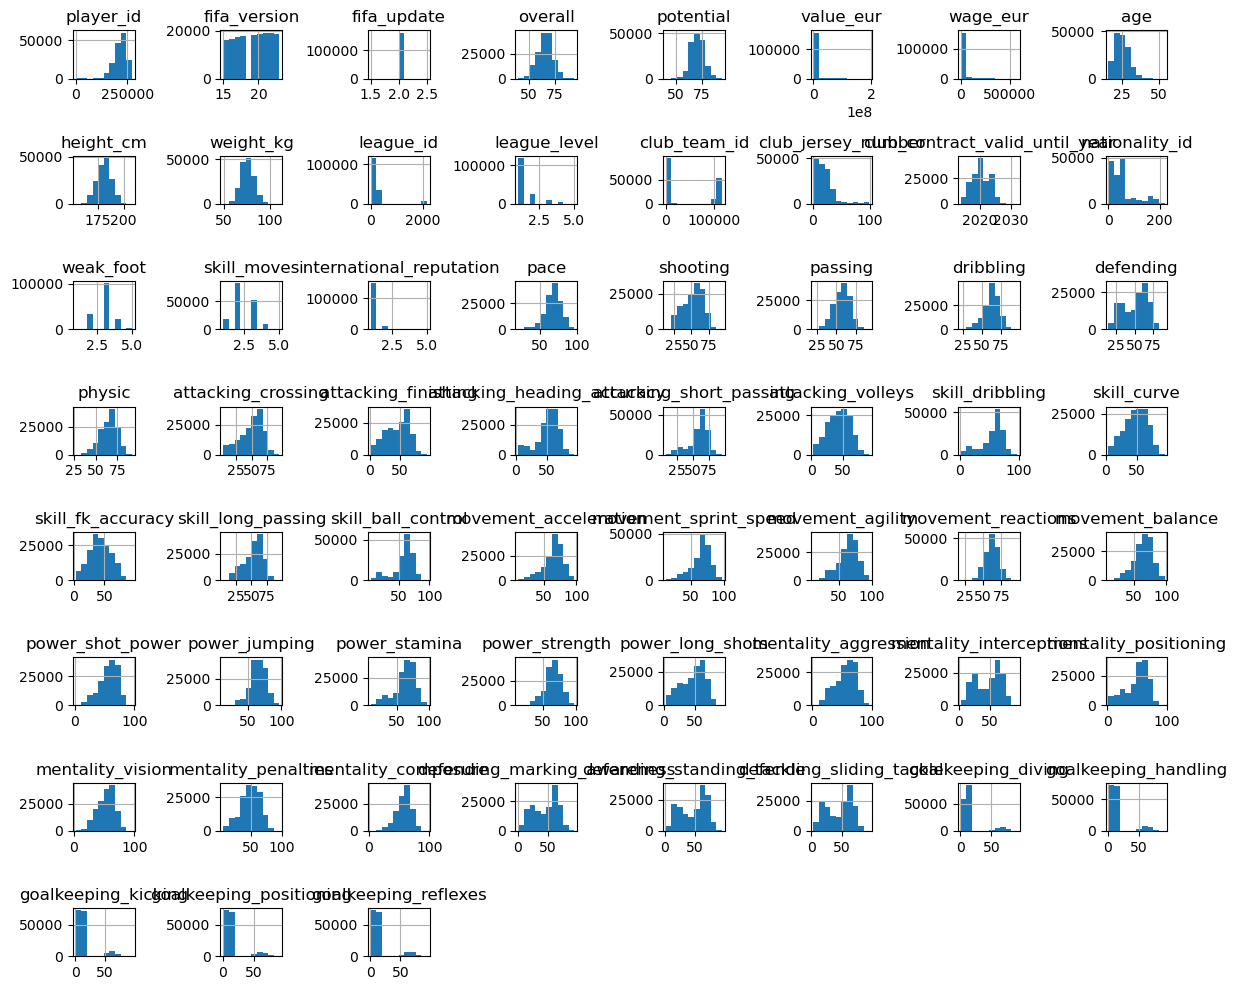

In [54]:
import matplotlib.pyplot as plt

# Histogram of numerical columns
df_cleaned.hist(figsize=(12,10))
plt.tight_layout()
plt.show()


In [ ]:
#Question 2

In [55]:

#Create feature subsets that show maximum correlation with the dependent variable.
correl = df.corr()['overall'].abs().sort_values(ascending=False)
top_features = correl.index[:10]
print(top_features)

Index(['overall', 'movement_reactions', 'potential', 'passing', 'wage_eur',
       'cm', 'lcm', 'rcm', 'mentality_composure', 'rf'],
      dtype='object')


In [56]:
#subset with high correlation features
sub_df = df[top_features]
sub_df

,overall,movement_reactions,potential,passing,wage_eur,cm,lcm,rcm,mentality_composure,rf
0,93,94,95,86.000000,550000.0,330,330,330,57.816892,300
1,92,90,92,81.000000,375000.0,315,315,315,57.816892,302
2,90,89,90,83.000000,275000.0,321,321,321,57.816892,291
3,90,85,90,81.000000,275000.0,306,306,306,57.816892,286
4,90,89,90,56.938175,300000.0,72,72,72,57.816892,48
...,...,...,...,...,...,...,...,...,...,...
161578,46,39,61,40.000000,700.0,79,79,79,40.000000,62
161579,46,42,58,29.000000,750.0,63,63,63,35.000000,35
161580,46,50,58,43.000000,500.0,103,103,103,35.000000,62
161581,46,45,70,36.000000,500.0,83,83,83,43.000000,62


In [57]:
#scale the subset dataframe with the correlation features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(sub_df[top_features])  # Scale selected features
scaled_df = pd.DataFrame(scaled_features, columns=top_features)  # Convert to DataFrame

scaled_df['overall']=df['overall']
scaled_df.head()

,overall,movement_reactions,potential,passing,wage_eur,cm,lcm,rcm,mentality_composure,rf
0,93,3.535775,3.875315,2.940185e+00,24.706815,2.415908,2.415908,2.415908,6.456683e-16,3.420880
1,92,3.099571,3.396013,2.434335e+00,16.687273,2.198758,2.198758,2.198758,6.456683e-16,3.456231
2,90,2.990520,3.076478,2.636675e+00,12.104678,2.285618,2.285618,2.285618,6.456683e-16,3.261798
3,90,2.554317,3.076478,2.434335e+00,12.104678,2.068467,2.068467,2.068467,6.456683e-16,3.173420
4,90,2.990520,3.076478,-7.188561e-16,13.250326,-1.319081,-1.319081,-1.319081,6.456683e-16,-1.033397


In [58]:
columns = scaled_df.columns

In [59]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
# Separate features and target variable
X = scaled_df.drop(columns=['overall'])
y = scaled_df['overall']

In [60]:

# scaling of X data
scaler = StandardScaler()
scaledfinal = scaler.fit_transform(X)

X = pd.DataFrame(scaledfinal, columns = X.columns)


In [ ]:
#Question 3 & 4

In [63]:
#first model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
random_model = RandomForestRegressor(n_estimators = 150)
random_model.fit(X,y)
rf_cv_scores = cross_val_score(random_model, X, y, cv=kf, scoring='neg_mean_squared_error')
rf_mse_scores = -rf_cv_scores  # Convert to positive
rf_mean_mse = np.mean(rf_mse_scores)
rf_mean_mse


3.3110157805267884

In [66]:
#second model
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
gradient_model = GradientBoostingRegressor(n_estimators = 1000, learning_rate=0.2)
gradient_model.fit(X,y)

gbr_cv_scores = cross_val_score(gradient_model, X, y, cv=kf, scoring='neg_mean_squared_error')
gbr_mse_scores = -gbr_cv_scores  # Convert to positive
gbr_mean_mse = np.mean(gbr_mse_scores)
gbr_mean_mse
     

3.6604766471062162

In [67]:
#thrid model 
from sklearn.tree import DecisionTreeRegressor
dtree_model = DecisionTreeRegressor()
dtree_model.fit(X, y)

dtree_cv_scores = cross_val_score(dtree_model, X, y, cv=kf, scoring='neg_mean_squared_error')
dtree_mse_scores = -dtree_cv_scores  # Convert to positive
dtree_mean_mse = np.mean(dtree_mse_scores)

dtree_mean_mse

6.6451382630407805

In [ ]:
'''from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_dist_rf = {
    'n_estimators': randint(100, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4)
}
random_search_rf = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42), 
                                      param_distributions=param_dist_rf, 
                                      n_iter=20,  # Number of parameter settings that are sampled
                                      cv=3,, 
                                      scoring='neg_mean_squared_error', 
                                      n_jobs=-1,
                                      verbose=2,
                                      random_state=42)
random_search_rf.fit(X, y)

# Get the best model
best_rf_model = random_search_rf.best_estimator_
print("Best Parameters: ", random_search_rf.best_params_)'''

In [ ]:
#Question 5

In [ ]:
#Testing our model on unseen data
player_url = "C:\\Users\\user\\Downloads\\players_22-1.csv"

In [ ]:
test_data = pd.read_csv(player_url, low_memory=False, usecols= columns)
test_data.head()
test_data.dtypes

In [71]:
num_cols =test_data.select_dtypes(exclude=['object'])
num_cols

,overall,potential,wage_eur,passing,movement_reactions,mentality_composure
0,93,93,320000.0,91.0,94,96
1,92,92,270000.0,79.0,93,88
2,91,91,270000.0,80.0,94,95
3,91,91,270000.0,86.0,89,93
4,91,91,350000.0,93.0,91,89
...,...,...,...,...,...,...
19234,47,52,1000.0,46.0,53,37
19235,47,59,500.0,50.0,49,47
19236,47,55,500.0,45.0,46,36
19237,47,60,500.0,36.0,48,47


In [72]:
categor_cols= test_data.select_dtypes(include=['object'])
categor_cols

,rf,lcm,cm,rcm
0,93,87+3,87+3,87+3
1,88,80+3,80+3,80+3
2,89,78+3,78+3,78+3
3,88,82+3,82+3,82+3
4,87,89+2,89+2,89+2
...,...,...,...,...
19234,45,46+2,46+2,46+2
19235,46,47+2,47+2,47+2
19236,46,47+2,47+2,47+2
19237,47,39+2,39+2,39+2


In [73]:
num_cols = num_cols.fillna(num_cols.mean())
num_cols

,overall,potential,wage_eur,passing,movement_reactions,mentality_composure
0,93,93,320000.0,91.0,94,96
1,92,92,270000.0,79.0,93,88
2,91,91,270000.0,80.0,94,95
3,91,91,270000.0,86.0,89,93
4,91,91,350000.0,93.0,91,89
...,...,...,...,...,...,...
19234,47,52,1000.0,46.0,53,37
19235,47,59,500.0,50.0,49,47
19236,47,55,500.0,45.0,46,36
19237,47,60,500.0,36.0,48,47


In [97]:

# Apply label encoder to each categorical column
fData = categor_cols.apply(encoder.fit_transform)
print("Encoded Categorical Columns:")
print(fData.head())

Encoded Categorical Columns:
    rf  lcm   cm  rcm
0  131  210  210  210
1  128  186  186  186
2  129  177  177  177
3  128  195  195  195
4  127  211  211  211


In [89]:
#Concatenation of numerical values and encoded categorical values 
new_test_data = pd.concat([num_cols,fData], axis =1)
new_test_data = new_test_data.fillna(df.mean())
new_test_data

,overall,potential,wage_eur,passing,movement_reactions,mentality_composure,rf,lcm,cm,rcm
0,93,93,320000.0,91.0,94,96,131,210,210,210
1,92,92,270000.0,79.0,93,88,128,186,186,186
2,91,91,270000.0,80.0,94,95,129,177,177,177
3,91,91,270000.0,86.0,89,93,128,195,195,195
4,91,91,350000.0,93.0,91,89,127,211,211,211
...,...,...,...,...,...,...,...,...,...,...
19234,47,52,1000.0,46.0,53,37,30,48,48,48
19235,47,59,500.0,50.0,49,47,31,49,49,49
19236,47,55,500.0,45.0,46,36,31,49,49,49
19237,47,60,500.0,36.0,48,47,32,35,35,35


In [90]:
new_test_data.head()

,overall,potential,wage_eur,passing,movement_reactions,mentality_composure,rf,lcm,cm,rcm
0,93,93,320000.0,91.0,94,96,131,210,210,210
1,92,92,270000.0,79.0,93,88,128,186,186,186
2,91,91,270000.0,80.0,94,95,129,177,177,177
3,91,91,270000.0,86.0,89,93,128,195,195,195
4,91,91,350000.0,93.0,91,89,127,211,211,211


In [ ]:
columns = ['overall', 'potential', 'wage_eur', 'passing', 'movement_reactions', 'mentality_composure','rf', 'lcm', 'cm', 'rcm']

In [91]:
new_test_data = new_test_data[columns]
new_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   overall              19239 non-null  int64  
 1   movement_reactions   19239 non-null  int64  
 2   potential            19239 non-null  int64  
 3   passing              19239 non-null  float64
 4   wage_eur             19239 non-null  float64
 5   cm                   19239 non-null  int32  
 6   lcm                  19239 non-null  int32  
 7   rcm                  19239 non-null  int32  
 8   mentality_composure  19239 non-null  int64  
 9   rf                   19239 non-null  int32  
dtypes: float64(2), int32(4), int64(4)
memory usage: 1.2 MB


In [98]:
#Splitting the dataset into dependent and independent variables

Y_test = new_test_data['overall']

X_test = new_test_data.drop(['overall'], axis=1)

scalered_data = scaler.transform(X_test)

In [94]:
scalered_data

array([[ 94.,  93.,  91., ..., 210.,  96., 131.],
       [ 93.,  92.,  79., ..., 186.,  88., 128.],
       [ 94.,  91.,  80., ..., 177.,  95., 129.],
       ...,
       [ 46.,  55.,  45., ...,  49.,  36.,  31.],
       [ 48.,  60.,  36., ...,  35.,  47.,  32.],
       [ 54.,  60.,  45., ...,  48.,  36.,  32.]])

In [ ]:
Y_pred = best_rf_model.predict(scalered_data)
test_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f"Test RMSE: {test_rmse:.2f}")

In [95]:
df_final = pd.DataFrame(scalered_data, columns =X_test.columns)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   movement_reactions   19239 non-null  float64
 1   potential            19239 non-null  float64
 2   passing              19239 non-null  float64
 3   wage_eur             19239 non-null  float64
 4   cm                   19239 non-null  float64
 5   lcm                  19239 non-null  float64
 6   rcm                  19239 non-null  float64
 7   mentality_composure  19239 non-null  float64
 8   rf                   19239 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB


In [104]:
from sklearn.metrics import mean_squared_error
randomF_y_pred = random_model.predict(scalered_data)
randomF_rmse = mean_squared_error(Y_test, randomF_y_pred, squared=False)
print(f"RandomForestRegressor RMSE: {randomF_rmse}")

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


RandomForestRegressor RMSE: 28.961131627553065


In [105]:
grad_y_pred = gradient_model.predict(scalered_data)
grad_rmse = mean_squared_error(Y_test, grad_y_pred, squared=False)
print(f"GradientBoostingRegressor RMSE: {grad_rmse}")

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


GradientBoostingRegressor RMSE: 29.07260342864976


In [107]:

# Choose the best model based on RMSE
best_model = random_model if randomF_rmse < grad_rmse else gradient_model
print(f"Best Model: {'RandomForestRegressor' if best_model == random_model else 'GradientBoostingRegressor'}")

Best Model: RandomForestRegressor


In [108]:
#Saving the model
from joblib import dump
import joblib


In [109]:
joblib.dump(best_model, 'best_model.pkl')
print("Best model saved!")

Best model saved!
